# Assessment 8

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests
import plotly.express as px

## Reading in APIs

In [4]:
def get_request(url, parameters = {}):
    return requests.get(url, params = parameters)

In [5]:
company_summary_url = "https://api.census.gov/data/2018/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=us:*"
business_char_url = "https://api.census.gov/data/2018/abscb?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,QDESC,QDESC_LABEL,BUSCHAR,BUSCHAR_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,RCPPDEMP_PCT_F,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,FIRMPDEMP_S,FIRMPDEMP_S_F,FIRMPDEMP_PCT_S,FIRMPDEMP_PCT_S_F,RCPPDEMP_S,RCPPDEMP_S_F,RCPPDEMP_PCT_S,RCPPDEMP_PCT_S_F,EMP_S,EMP_S_F,EMP_PCT_S,EMP_PCT_S_F,PAYANN_S,PAYANN_S_F,PAYANN_PCT_S,PAYANN_PCT_S_F&for=us:*"
owner_char_url = "https://api.census.gov/data/2018/abscbo?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,OWNER_SEX,OWNER_SEX_LABEL,OWNER_ETH,OWNER_ETH_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_VET,OWNER_VET_LABEL,QDESC,QDESC_LABEL,OWNCHAR,OWNCHAR_LABEL,YEAR,OWNPDEMP,OWNPDEMP_F,OWNPDEMP_PCT,OWNPDEMP_PCT_F,OWNPDEMP_S,OWNPDEMP_S_F,OWNPDEMP_PCT_S,OWNPDEMP_PCT_S_F&for=us:*"
tech_char_url = "https://api.census.gov/data/2018/abstcb?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,NSFSZFI,NSFSZFI_LABEL,FACTORS_P,FACTORS_P_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,RCPPDEMP_PCT_F,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,FIRMPDEMP_S,FIRMPDEMP_S_F,FIRMPDEMP_PCT_S,FIRMPDEMP_PCT_S_F,RCPPDEMP_S,RCPPDEMP_S_F,RCPPDEMP_PCT_S,RCPPDEMP_PCT_S_F,EMP_S,EMP_S_F,EMP_PCT_S,EMP_PCT_S_F,PAYANN_S,PAYANN_S_F,PAYANN_PCT_S,PAYANN_PCT_S_F&for=us:*"

company_response = requests.get(company_summary_url)
business_char_response = requests.get(business_char_url)
owner_char_response = requests.get(owner_char_url)
tech_char_response = requests.get(tech_char_url)

In [6]:
company_summary_data = company_response.json()
business_data = business_char_response.json()
owner_data = owner_char_response.json()
tech_data = tech_char_response.json()

company_df = pd.DataFrame(company_summary_data[1:], columns=company_summary_data[0])
business_df = pd.DataFrame(business_data[1:], columns=business_data[0])
owner_df = pd.DataFrame(owner_data[1:], columns=owner_data[0])
tech_df = pd.DataFrame(tech_data[1:], columns=tech_data[0])

# df_company_s = pd.DataFrame(company_summary_data[1:], columns=(company_summary_data[0]))
# df_company_s.head()

In [63]:
# adding extra years
company_summary_url_2020 = "https://api.census.gov/data/2019/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=us:*"
company_summary_url_2021 = "https://api.census.gov/data/2020/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=us:*"

company_response_2020 = requests.get(company_summary_url_2020)
company_response_2021 = requests.get(company_summary_url_2021)

In [64]:
# adding extra years
company_summary_data_2020 = company_response_2020.json()
company_summary_data_2021 = company_response_2021.json()

company_df_2020 = pd.DataFrame(company_summary_data_2020[1:], columns=company_summary_data_2020[0])
company_df_2021 = pd.DataFrame(company_summary_data_2021[1:], columns=company_summary_data_2021[0])

## Exploring the Data

#### Company Summary Info of Interest
- Sex, Ethnicity, Race, Veteran Status, Number of employees


In [2]:
# company_df.info()

## Filtering data

### Focus on company owners' race and ethnicity demographcs

In [15]:
# breaking dataframe up into dataframes focused on race and ethnicity demographics, not including totals, 'classifiable', 'unclassifiable', or generalized groups 'minority'/'nonminority'
company_df_grouped = company_df[company_df['EMPSZFI_LABEL'] != 'All firms']
company_df_ethrace = company_df_grouped[~company_df_grouped['RACE_GROUP_LABEL'].isin(['Total', 'Classifiable', 'Unclassifiable', 'Minority', 'Nonminority', 'Equally minority/nonminority'])]
company_df_ethrace = company_df_grouped[~company_df_grouped['ETH_GROUP_LABEL'].isin(['Total', 'Classifiable', 'Unclassifiable'])]

company_df_grouped_race = company_df_grouped[~company_df_grouped['RACE_GROUP_LABEL'].isin(['Total', 'Classifiable', 'Unclassifiable', 'Minority', 'Nonminority', 'Equally minority/nonminority'])]
company_df_grouped_eth = company_df_grouped[~company_df_grouped['ETH_GROUP_LABEL'].isin(['Total', 'Classifiable', 'Unclassifiable'])]

In [18]:
company_df_grouped_race['RACE_GROUP_LABEL'].value_counts()

In [19]:
company_df_grouped_race['NAICS2017_LABEL'].value_counts()

In [217]:
race_breakdown = company_df_grouped_race['RACE_GROUP_LABEL'].value_counts()
ethnicity_breakdown = company_df_grouped_eth['ETH_GROUP_LABEL'].value_counts()
ethnicity_breakdown

Non-Hispanic    2086
Hispanic        1487
Name: ETH_GROUP_LABEL, dtype: int64

<AxesSubplot:>

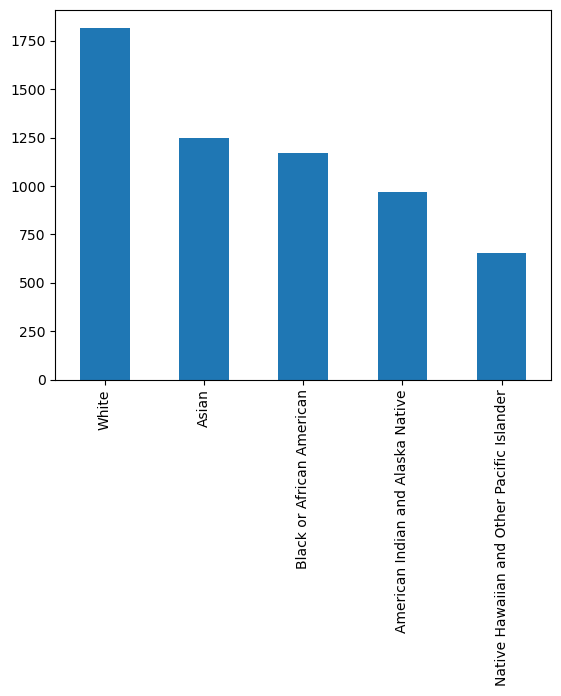

In [207]:
race_breakdown.plot.bar()

<AxesSubplot:>

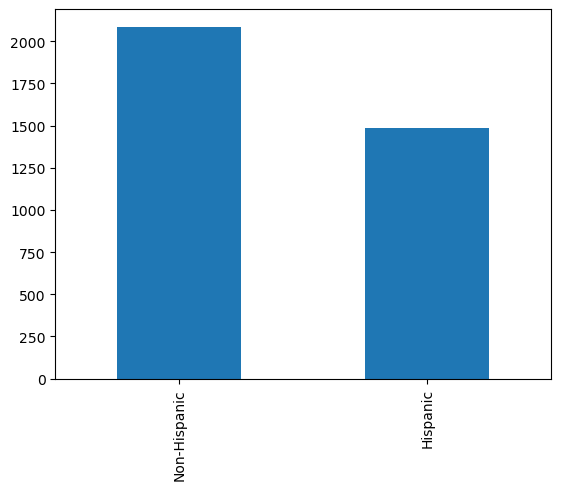

In [218]:
ethnicity_breakdown.plot.bar()

### Race and ethnicity breakdowns grouped by sector / top sectors for each race/ethnicity breakdown

In [209]:
race_by_sector = company_df_grouped_race[['NAICS2017_LABEL','RACE_GROUP_LABEL']].groupby('NAICS2017_LABEL')
# race_by_sector.head(2)
# race_by_sector.value_counts()
# race_by_sector['RACE_GROUP_LABEL'].value_counts().plot.bar()

In [17]:
race_by_sector.get_group('Accommodation and food services').value_counts().plot.bar()

In [37]:
treemap_df = company_df_grouped_race.groupby(['NAICS2017_LABEL','RACE_GROUP_LABEL']).size().reset_index(name='count') 
# treemap_df = treemap_df.loc[~treemap_df["RACE_GROUP_LABEL"].str.contains("White")] 
treemap_df = treemap_df.loc[~treemap_df["NAICS2017_LABEL"].str.contains('Total for all sectors')]

treemap_df = treemap_df.replace('Administrative and support and waste management and remediation services','Admin &<br> support & waste<br> mgmt &<br> remediation serv')
treemap_df = treemap_df.replace('Professional, scientific, and technical services','Professional,<br>scientific,<br>& technical serv')
treemap_df = treemap_df.replace('Transportation and warehousing','Transportation<br>& warehousing')
treemap_df = treemap_df.replace('Accommodation and food services','Accommodation<br>& food services')
treemap_df = treemap_df.replace('Health care and social assistance','Health care<br>& social assistance')
treemap_df = treemap_df.replace('Real estate and rental and leasing','Real estate &<br>rental & leasing')
treemap_df = treemap_df.replace('Arts, entertainment, and recreation','Arts, <br>entertainment,<br>& recreation')
treemap_df = treemap_df.replace('Management of companies and enterprises','Mgmt of companies<br>& enterprises')
treemap_df = treemap_df.replace('Other services (except public administration)','Other services<br>(except public administration)')
treemap_df = treemap_df.replace('Mining, quarrying, and oil and gas extraction','Mining, quarrying,<br>& oil & gas extraction')
treemap_df = treemap_df.replace('Agriculture, forestry, fishing and hunting','Agriculture, forestry,<br>fishing & hunting')
treemap_df = treemap_df.replace('Other services<br>(except public administration)','Other services<br>(except public<br>admin)')
treemap_df = treemap_df.replace('Finance and insurance', 'Finance<br>& insurance')

fig = px.treemap(treemap_df, path=['RACE_GROUP_LABEL','NAICS2017_LABEL'],values='count', color = 'count' )
fig.show()

In [36]:
treemap_df = company_df_grouped_eth.groupby(['NAICS2017_LABEL','ETH_GROUP_LABEL']).size().reset_index(name='count') 
treemap_df = treemap_df.loc[~treemap_df["NAICS2017_LABEL"].str.contains('Total for all sectors')] 

treemap_df = treemap_df.replace('Administrative and support and waste management and remediation services','Admin &<br> support & waste<br> mgmt &<br> remediation serv')
treemap_df = treemap_df.replace('Professional, scientific, and technical services','Professional,<br>scientific,<br>& technical serv')
treemap_df = treemap_df.replace('Transportation and warehousing','Transportation<br>& warehousing')
treemap_df = treemap_df.replace('Accommodation and food services','Accommodation<br>& food services')
treemap_df = treemap_df.replace('Health care and social assistance','Health care<br>& social assistance')
treemap_df = treemap_df.replace('Real estate and rental and leasing','Real estate &<br>rental & leasing')
treemap_df = treemap_df.replace('Arts, entertainment, and recreation','Arts, <br>entertainment,<br>& recreation')
treemap_df = treemap_df.replace('Management of companies and enterprises','Mgmt of companies<br>& enterprises')
treemap_df = treemap_df.replace('Other services (except public administration)','Other services<br>(except public administration)')
treemap_df = treemap_df.replace('Mining, quarrying, and oil and gas extraction','Mining, quarrying,<br>& oil & gas extraction')
treemap_df = treemap_df.replace('Agriculture, forestry, fishing and hunting','Agriculture, forestry,<br>fishing & hunting')
treemap_df = treemap_df.replace('Other services<br>(except public administration)','Other services<br>(except public<br>admin)')
treemap_df = treemap_df.replace('Finance and insurance', 'Finance<br>& insurance')

fig = px.treemap(treemap_df, path=['ETH_GROUP_LABEL','NAICS2017_LABEL'],values='count', color = 'count')
fig.update_traces( textfont_size=14)
fig.show()

### 

### Race and ethnicity breakdowns grouped by number of employees

In [38]:
label_change = {'RACE_GROUP_LABEL': 'Race Group', 'EMPSZFI_LABEL': 'Number of Employees at Firm'}
order = {'EMPSZFI_LABEL': ['Firms with 500 employees or more','Firms with 250 to 499 employees','Firms with 100 to 249 employees','Firms with 50 to 99 employees','Firms with 20 to 49 employees','Firms with 10 to 19 employees','Firms with 5 to 9 employees','Firms with 1 to 4 employees','Firms with no employees']}
fig = px.violin(company_df_grouped_race, y="EMPSZFI_LABEL", x="RACE_GROUP_LABEL", color="RACE_GROUP_LABEL", labels=label_change, category_orders=order)

fig.show()

In [226]:
num_employees_race = company_df_grouped_eth[['EMPSZFI_LABEL','RACE_GROUP_LABEL']].groupby('RACE_GROUP_LABEL')
# num_employees_race.value_counts()

In [39]:
label_change = {'ETH_GROUP_LABEL': 'Ethnicity Group', 'EMPSZFI_LABEL': 'Number of Employees at Firm'}
fig = px.violin(company_df_grouped_eth, y="EMPSZFI_LABEL", x="ETH_GROUP_LABEL", color="ETH_GROUP_LABEL", labels=label_change, category_orders=order)

fig.show()

### Revenue of Company correlation to Number of Employees

#### Ethnicity Groups Comparison

In [7]:
rev_per_employees = company_df[['RCPPDEMP', 'EMP', 'ETH_GROUP_LABEL']]
rpe_1 = rev_per_employees[rev_per_employees['ETH_GROUP_LABEL'] == 'Hispanic']
rpe_1 = rpe_1[rpe_1['RCPPDEMP'] != '0']
rpe_2 = rev_per_employees[rev_per_employees['ETH_GROUP_LABEL'] == 'Non-Hispanic']
rpe_2 = rpe_2[rpe_2['RCPPDEMP'] != '0']


rpe_1['RCPPDEMP'] = pd.to_numeric(rpe_1['RCPPDEMP'])
rpe_1['EMP'] = pd.to_numeric(rpe_1['EMP'])
rpe_2['RCPPDEMP'] = pd.to_numeric(rpe_2['RCPPDEMP'])
rpe_2['EMP'] = pd.to_numeric(rpe_2['EMP'])

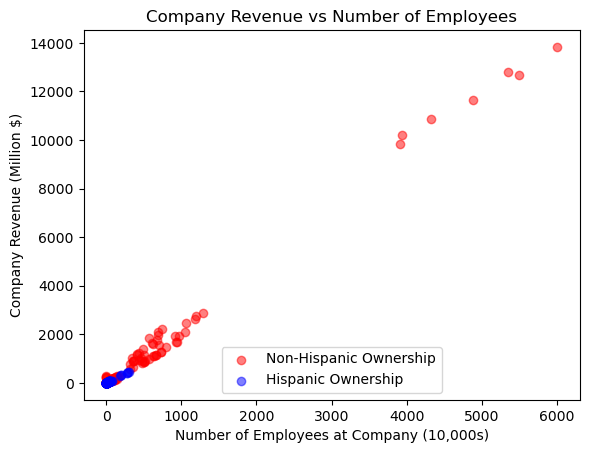

In [8]:
# ax = rev_per_employees.plot(title = 'Revenue vs Number of Employees', kind='scatter', x='EMP', y='RCPPDEMP', alpha =0.7)
plt.scatter(x=rpe_2['EMP']/10000, y=rpe_2['RCPPDEMP']/1000000, alpha = 0.5, color='red', label='Non-Hispanic Ownership')
plt.scatter(x=rpe_1['EMP']/10000, y=rpe_1['RCPPDEMP']/1000000, alpha = 0.5, color='blue', label='Hispanic Ownership')
plt.title('Company Revenue vs Number of Employees')
plt.xlabel('Number of Employees at Company (10,000s)')
plt.ylabel('Company Revenue (Million $)')
plt.legend(loc=8)
plt.show()

#### Race Groups Comparison

In [9]:
rev_per_employees = company_df[['RCPPDEMP', 'EMP', 'RACE_GROUP_LABEL']]
rpe_1 = rev_per_employees[rev_per_employees['RACE_GROUP_LABEL'] == 'White']
rpe_1 = rpe_1[rpe_1['RCPPDEMP'] != '0']
rpe_2 = rev_per_employees[rev_per_employees['RACE_GROUP_LABEL'] == 'Black or African American']
rpe_2 = rpe_2[rpe_2['RCPPDEMP'] != '0']
rpe_3 = rev_per_employees[rev_per_employees['RACE_GROUP_LABEL'] == 'American Indian and Alaska Native']
rpe_3 = rpe_3[rpe_3['RCPPDEMP'] != '0']
rpe_4 = rev_per_employees[rev_per_employees['RACE_GROUP_LABEL'] == 'Asian']
rpe_4 = rpe_4[rpe_4['RCPPDEMP'] != '0']
rpe_5 = rev_per_employees[rev_per_employees['RACE_GROUP_LABEL'] == 'Native Hawaiian and Other Pacific Islander']
rpe_5 = rpe_5[rpe_5['RCPPDEMP'] != '0']

rpe_1['RCPPDEMP'] = pd.to_numeric(rpe_1['RCPPDEMP'])
rpe_1['EMP'] = pd.to_numeric(rpe_1['EMP'])
rpe_2['RCPPDEMP'] = pd.to_numeric(rpe_2['RCPPDEMP'])
rpe_2['EMP'] = pd.to_numeric(rpe_2['EMP'])
rpe_3['RCPPDEMP'] = pd.to_numeric(rpe_3['RCPPDEMP'])
rpe_3['EMP'] = pd.to_numeric(rpe_3['EMP'])
rpe_4['RCPPDEMP'] = pd.to_numeric(rpe_4['RCPPDEMP'])
rpe_4['EMP'] = pd.to_numeric(rpe_4['EMP'])
rpe_5['RCPPDEMP'] = pd.to_numeric(rpe_5['RCPPDEMP'])
rpe_5['EMP'] = pd.to_numeric(rpe_5['EMP'])

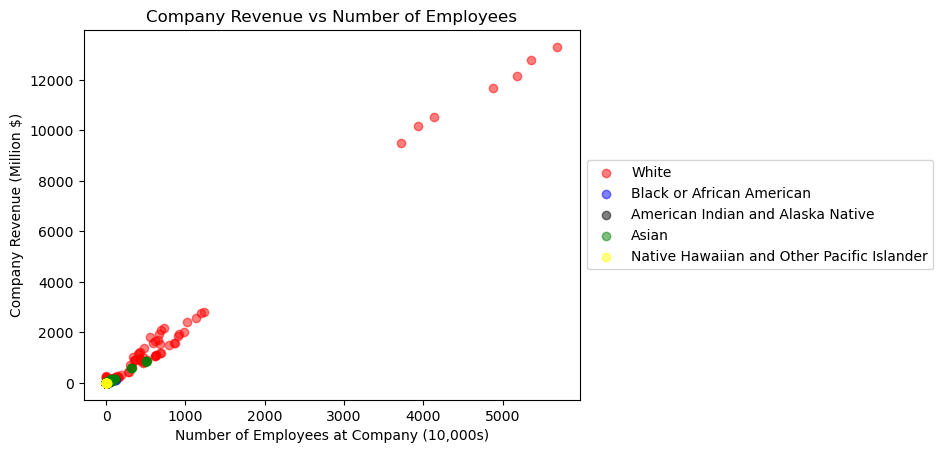

In [10]:
plt.scatter(x=rpe_1['EMP']/10000, y=rpe_1['RCPPDEMP']/1000000, alpha = 0.5, color='red', label='White')
plt.scatter(x=rpe_2['EMP']/10000, y=rpe_2['RCPPDEMP']/1000000, alpha = 0.5, color='blue', label='Black or African American')
plt.scatter(x=rpe_3['EMP']/10000, y=rpe_3['RCPPDEMP']/1000000, alpha = 0.5, color='black', label='American Indian and Alaska Native')
plt.scatter(x=rpe_4['EMP']/10000, y=rpe_4['RCPPDEMP']/1000000, alpha = 0.5, color='green', label='Asian')
plt.scatter(x=rpe_5['EMP']/10000, y=rpe_5['RCPPDEMP']/1000000, alpha = 0.5, color='yellow', label='Native Hawaiian and Other Pacific Islander')

plt.title('Company Revenue vs Number of Employees')
plt.xlabel('Number of Employees at Company (10,000s)')
plt.ylabel('Company Revenue (Million $)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

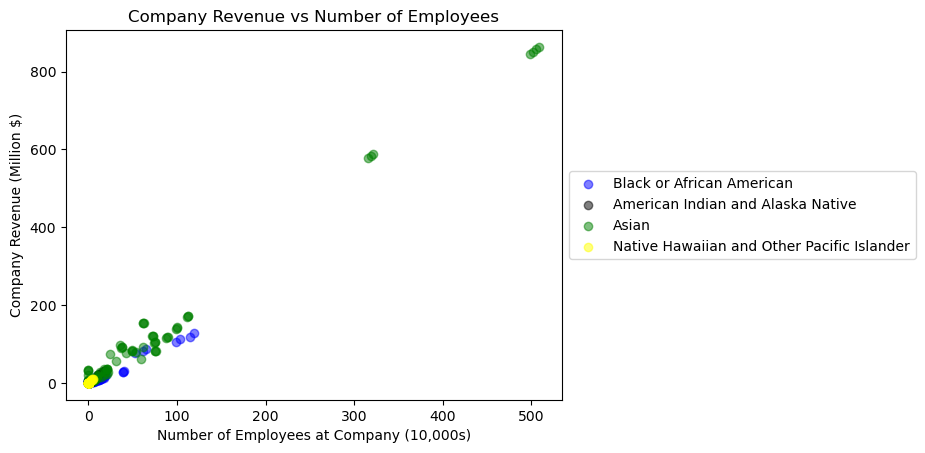

In [11]:
# Race groups minus White
plt.scatter(x=rpe_2['EMP']/10000, y=rpe_2['RCPPDEMP']/1000000, alpha = 0.5, color='blue', label='Black or African American')
plt.scatter(x=rpe_3['EMP']/10000, y=rpe_3['RCPPDEMP']/1000000, alpha = 0.5, color='black', label='American Indian and Alaska Native')
plt.scatter(x=rpe_4['EMP']/10000, y=rpe_4['RCPPDEMP']/1000000, alpha = 0.5, color='green', label='Asian')
plt.scatter(x=rpe_5['EMP']/10000, y=rpe_5['RCPPDEMP']/1000000, alpha = 0.5, color='yellow', label='Native Hawaiian and Other Pacific Islander')

plt.title('Company Revenue vs Number of Employees')
plt.xlabel('Number of Employees at Company (10,000s)')
plt.ylabel('Company Revenue (Million $)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

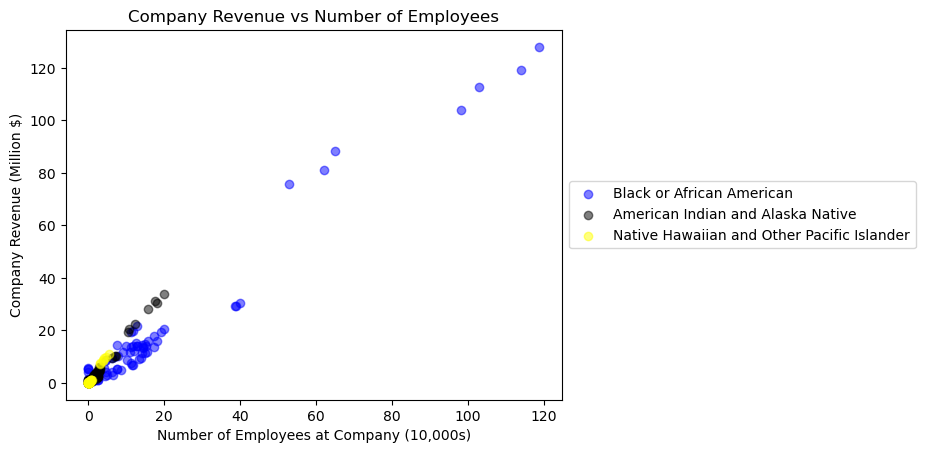

In [12]:
# race groups minus White or Asian
plt.scatter(x=rpe_2['EMP']/10000, y=rpe_2['RCPPDEMP']/1000000, alpha = 0.5, color='blue', label='Black or African American')
plt.scatter(x=rpe_3['EMP']/10000, y=rpe_3['RCPPDEMP']/1000000, alpha = 0.5, color='black', label='American Indian and Alaska Native')
plt.scatter(x=rpe_5['EMP']/10000, y=rpe_5['RCPPDEMP']/1000000, alpha = 0.5, color='yellow', label='Native Hawaiian and Other Pacific Islander')

plt.title('Company Revenue vs Number of Employees')
plt.xlabel('Number of Employees at Company (10,000s)')
plt.ylabel('Company Revenue (Million $)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Revenue of company by race and ethnicity

C:\Users\JesseNoss\AppData\Local\Temp\ipykernel_9232\1180112958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rev_company_race['RCPPDEMP'] = pd.to_numeric(rev_company_race['RCPPDEMP'])/1000000


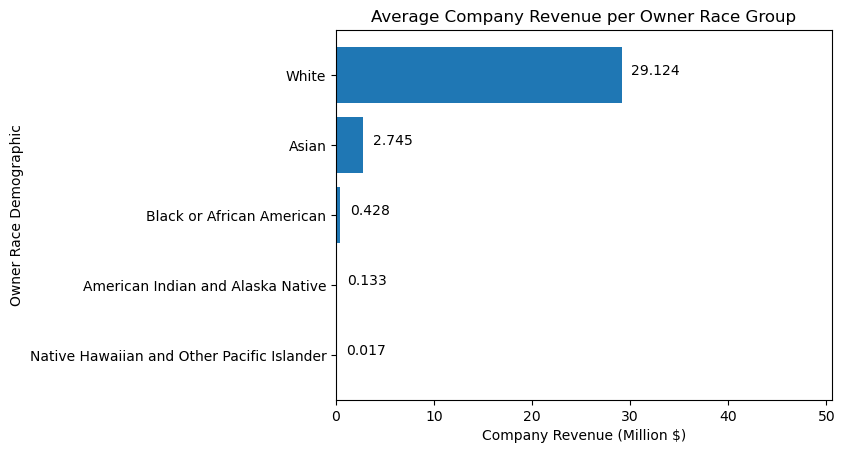

In [20]:
rev_company_race = company_df_grouped_race[['RCPPDEMP','RACE_GROUP_LABEL']]
rev_company_race['RCPPDEMP'] = pd.to_numeric(rev_company_race['RCPPDEMP'])/1000000
rev_company_race = rev_company_race.groupby('RACE_GROUP_LABEL').agg("mean")
sorted_ = rev_company_race.sort_values('RCPPDEMP')

y = sorted_['RCPPDEMP']
fig, ax = plt.subplots()
ax.barh(y.index, y)
_, xmax = plt.xlim()
plt.xlim(0, xmax+20)
for i, v in enumerate(y):
    plt.text(v + 1, i, round(v, 3))


plt.ylabel('Owner Race Demographic')
plt.xlabel('Company Revenue (Million $)')
plt.title('Average Company Revenue per Owner Race Group')
plt.show()

C:\Users\JesseNoss\AppData\Local\Temp\ipykernel_9232\3618155545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rev_company_eth['RCPPDEMP'] = pd.to_numeric(rev_company_eth['RCPPDEMP'])/1000000


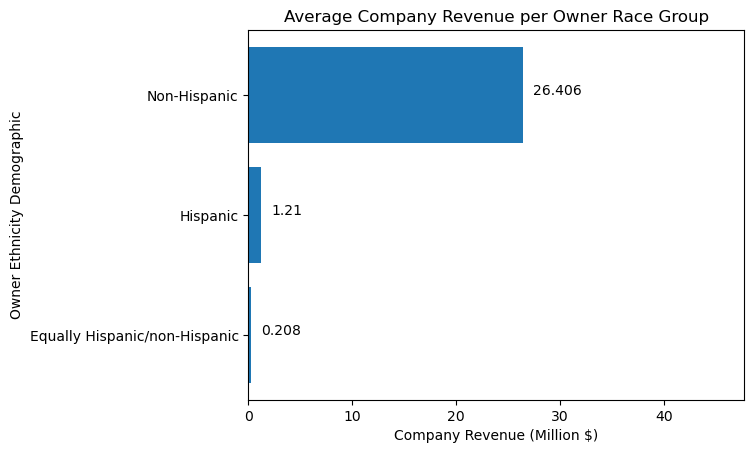

In [21]:
rev_company_eth = company_df_grouped_eth[['RCPPDEMP','ETH_GROUP_LABEL']]
rev_company_eth['RCPPDEMP'] = pd.to_numeric(rev_company_eth['RCPPDEMP'])/1000000
rev_company_eth = rev_company_eth.groupby('ETH_GROUP_LABEL').agg("mean")
sorted_ = rev_company_eth.sort_values('RCPPDEMP')

y = sorted_['RCPPDEMP']
fig, ax = plt.subplots()
ax.barh(y.index, y)
_, xmax = plt.xlim()
plt.xlim(0, xmax+20)
for i, v in enumerate(y):
    plt.text(v + 1, i, round(v, 3))


plt.ylabel('Owner Ethnicity Demographic')
plt.xlabel('Company Revenue (Million $)')
plt.title('Average Company Revenue per Owner Race Group')
plt.show()